# EasyICD

## Required imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, RandomSampler

from easy_icd.scraping.scrape_images import scrape_images
from easy_icd.utils.create_dataset import create_dataset
from easy_icd.utils.losses import SupConLoss
from easy_icd.utils.augmentation import RandomImageAugmenter

## Scrape images

In [5]:
class_names = ['shark', 'dog', 'horse', 'deer']
search_terms = [['great white shark', 'hammerhead shark', 'basking shark'],
                ['german shepherd', 'afghan hound', 'golden retriever', 'labrador'],
               ['stallion', 'white horse'],
                ['deer', 'canadian moose', 'elk']]
images_per_class = [[5, 5, 5], [3, 3, 6, 3], [10, 5], [5, 5, 5]]
image_dir = 'scraping_example_images'

scrape_images(class_names, image_dir, search_terms, images_per_class)

{'shark': {'great white shark': {'successful': True,
   'num_desired_images': 5,
   'num_saved_images': 5,
   'time_taken_in_seconds': 6.78118634223938},
  'hammerhead shark': {'successful': True,
   'num_desired_images': 5,
   'num_saved_images': 5,
   'time_taken_in_seconds': 3.6699790954589844},
  'basking shark': {'successful': True,
   'num_desired_images': 5,
   'num_saved_images': 5,
   'time_taken_in_seconds': 3.450639486312866},
  'time_taken_in_seconds': 13.90180492401123,
  'num_desired_images': 15,
  'num_saved_images': 15,
  'successful': True},
 'dog': {'german shepherd': {'successful': True,
   'num_desired_images': 3,
   'num_saved_images': 3,
   'time_taken_in_seconds': 3.808958053588867},
  'afghan hound': {'successful': True,
   'num_desired_images': 3,
   'num_saved_images': 3,
   'time_taken_in_seconds': 6.226581811904907},
  'golden retriever': {'successful': True,
   'num_desired_images': 6,
   'num_saved_images': 6,
   'time_taken_in_seconds': 3.841588258743286}

## Create dataset

In [2]:
img_dir = './../images/mini_cifar'

ds = create_dataset(img_dir, None, False)
random_sampler = RandomSampler(ds, False)
dataloader = DataLoader(ds, batch_size=32, shuffle=True)

In [3]:
next(iter(dataloader))[0][1]

tensor([[[ 67,  69,  69,  ...,  49,  47,  46],
         [118, 112, 106,  ...,  55,  52,  48],
         [130, 132, 132,  ..., 111, 111, 108],
         ...,
         [135, 138, 149,  ..., 177, 186, 170],
         [114,  91, 118,  ..., 194, 168, 170],
         [125, 138, 137,  ..., 179, 143, 161]],

        [[ 62,  64,  64,  ...,  45,  43,  41],
         [107, 101,  93,  ...,  45,  39,  35],
         [111, 113, 113,  ...,  92,  89,  86],
         ...,
         [ 91,  94, 105,  ..., 123, 132, 116],
         [ 70,  47,  74,  ..., 140, 114, 116],
         [ 80,  93,  93,  ..., 125,  87, 105]],

        [[ 42,  44,  44,  ...,  42,  40,  38],
         [ 87,  81,  74,  ...,  36,  31,  27],
         [ 94,  96,  96,  ...,  77,  75,  72],
         ...,
         [ 56,  59,  68,  ...,  79,  88,  72],
         [ 35,  12,  39,  ...,  94,  68,  70],
         [ 47,  60,  58,  ...,  79,  40,  58]]], dtype=torch.uint8)

## Randomly augment images

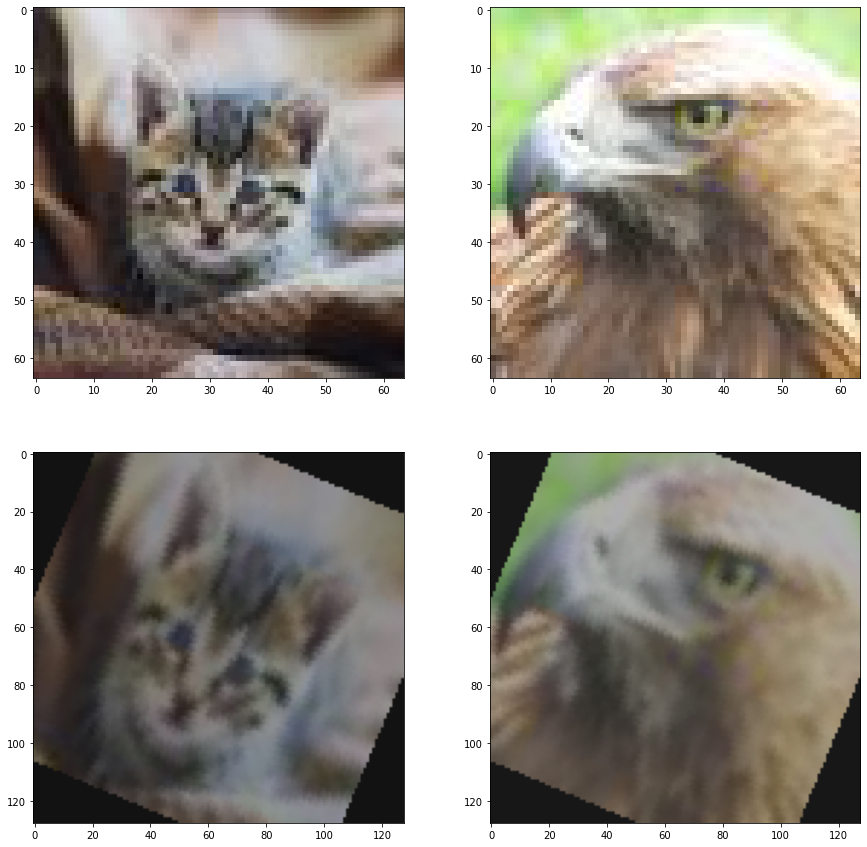

In [35]:
probs = 0.2 * torch.ones(9)

augmenter = RandomImageAugmenter((128, 128), probs)

images = next(iter(dataloader))[0]
augmented_images = augmenter.augment(images)

img = [images, augmented_images]

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

for i in range(2):
    for j in range(2):
        ax[i, j].imshow(np.rot90(np.asarray(img[i][j]).T, 3))

## Test contrastive loss

In [42]:
loss_fn = SupConLoss(0.1, 'all', True)

features = torch.rand((4, 2, 2))
features[1] = features[0]
features[2] = -1 * features[0]
features[3] = -1 * features[0]

labels = torch.Tensor([0, 1, 0, 1])

print(features)

print(loss_fn(features, labels))
print(loss_fn(features))

tensor([[[ 0.3684,  0.6746],
         [ 0.4196,  0.8708]],

        [[ 0.3684,  0.6746],
         [ 0.4196,  0.8708]],

        [[-0.3684, -0.6746],
         [-0.4196, -0.8708]],

        [[-0.3684, -0.6746],
         [-0.4196, -0.8708]]])
tensor(1.4423)
tensor(0.1103)
